In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [48]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [0]:
selected_cols = ['length','width',
                'curb-weight','engine-size',
                'horsepower','city-mpg',
                'highway-mpg','wheel-base',
                'bore','drive-wheels',]
X = df[selected_cols].copy()
y = df['price']

In [50]:
X.head()

,length,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,wheel-base,bore,drive-wheels
0,0.811148,0.890278,2548,130,111.0,21,27,88.6,3.47,rwd
1,0.811148,0.890278,2548,130,111.0,21,27,88.6,3.47,rwd
2,0.822681,0.909722,2823,152,154.0,19,26,94.5,2.68,rwd
3,0.848630,0.919444,2337,109,102.0,24,30,99.8,3.19,fwd
4,0.848630,0.922222,2824,136,115.0,18,22,99.4,3.19,4wd


In [0]:
X = pd.get_dummies(X,columns=['drive-wheels'],) 

In [52]:
X.dtypes

length              float64
width               float64
curb-weight           int64
engine-size           int64
horsepower          float64
city-mpg              int64
highway-mpg           int64
wheel-base          float64
bore                float64
drive-wheels_4wd      uint8
drive-wheels_fwd      uint8
drive-wheels_rwd      uint8
dtype: object

In [0]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
trainX, testX, trainY, testY = train_test_split(X,y,test_size=.2,random_state=0)

In [55]:
model = LinearRegression()
model.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
model.score(testX,testY) * 100

78.20359945985909

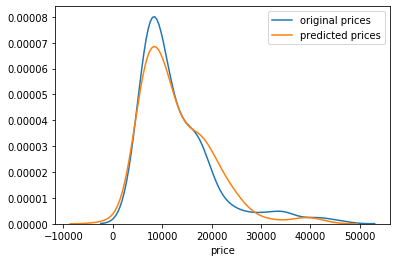

In [57]:
yhat = model.predict(trainX)
ax = sns.distplot(trainY,hist=False, label='original prices')
sns.distplot(yhat,hist=False, label='predicted prices',ax = ax)
plt.show()

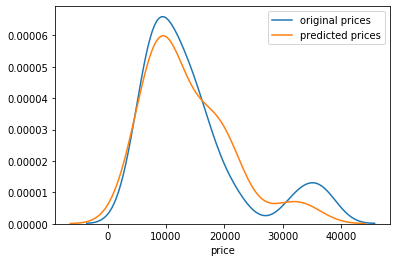

In [58]:
yhat = model.predict(testX)
ax = sns.distplot(testY,hist=False, label='original prices')
sns.distplot(yhat,hist=False, label='predicted prices',ax = ax)
plt.show()

In [0]:
# new data set

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [60]:
df = pd.read_csv('/content/drive/My Drive/courses/data analytics/datasets/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [62]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


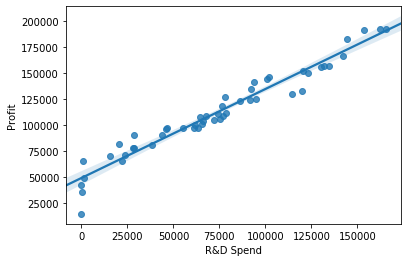

In [63]:
sns.regplot(x='R&D Spend',y='Profit',data=df)
plt.show()

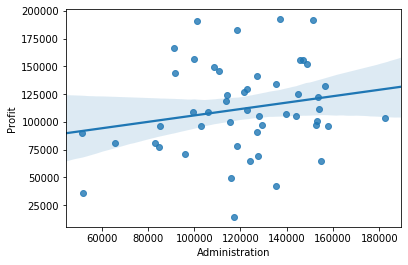

In [64]:
sns.regplot(x='Administration',y='Profit',data=df)
plt.show()

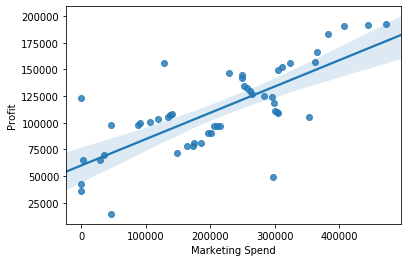

In [66]:
sns.regplot(x='Marketing Spend',y='Profit',data=df)
plt.show()

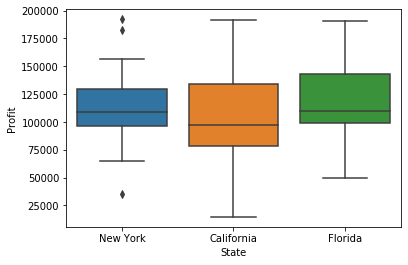

In [69]:
sns.boxplot(x='State',y='Profit',data=df)

In [70]:
X = df[['R&D Spend','Marketing Spend']]
y = df['Profit']
trainX, testX, trainY, testY = train_test_split(X,y,test_size=.2,random_state=0)
model = LinearRegression()
model.fit(trainX,trainY)
model.score(testX,testY) *100

94.74386447268488

In [0]:
import pickle

In [72]:
with open('profitModel.pk','wb') as f:
    pickle.dump(model,f)
    print('saved model')

saved model


In [0]:
with open('profitModel.pk','rb') as f:
    mymodel = pickle.load(f)

In [75]:
mymodel.score(testX,testY) * 100

94.74386447268488